In [2]:
import pandas as pd

# Create data frames manually

In [3]:
s = pd.Series(['banana', 42])
s

0    banana
1        42
dtype: object

In [5]:
# Relabel index as labels
s2 = pd.Series(['Wes', 'Creator'], index=['person', 'who'])
#s2.loc['person']
s2

person        Wes
who       Creator
dtype: object

In [10]:
# Using dictionary, initialize row/cols with dictionary
df1 = pd.DataFrame(
        data={'Col1': [1, 2, 3]
             , 'Col2': [4, 5, 6]
             , 'Col3': [7, 8, 9]}
        , index=[1, 2, 3] # can be labels
        , columns=['Col3', 'Col2', 'Col1']) # re-order
df1

,Col3,Col2,Col1
1,7,4,1
2,8,5,2
3,9,6,3


In [7]:
scientists = pd.read_csv('./data/scientists.csv')
scientists.sample(5)

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
5,John Snow,1813-03-15,1858-06-16,45,Physician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist


In [11]:
ages = scientists.loc[scientists.Age > 50, ['Age']] # or .['Age']
ages

,Age
1,61
2,90
3,66
4,56
7,77


In [24]:
# Profile statistics
ages.describe()

,Age
count,8.000000
mean,59.125000
std,18.325918
min,37.000000
25%,44.000000
50%,58.500000
75%,68.750000
max,90.000000


# Filtering

In [15]:
# mean() on a series returns a 1 element series
ages[(ages > ages.mean()) & ~(ages > 75)] # need bitwise operators

,Age
1,NaN
2,NaN
3,NaN
4,NaN
7,NaN


In [16]:
# Boolean way
scientists.loc[scientists.Age > scientists.Age.mean(), ['Name', 'Age']]

# or: scientists[scientists.Age > scientists.Age.mean()]

,Name,Age
1,William Gosset,61
2,Florence Nightingale,90
3,Marie Curie,66
7,Johann Gauss,77


# Data conversion

In [44]:
born_datetime = pd.to_datetime(scientists.Born, format='%Y-%m-%d')
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

# Add a column

In [46]:
scientists['born_dt'] = born_datetime
scientists.dtypes

Name                  object
Born                  object
Died                  object
Age                    int64
Occupation            object
born_dt       datetime64[ns]
dtype: object

# Plotting using seaborn

In [49]:
import seaborn as sns # abstracts matplotlib
import matplotlib.pyplot as plt # installed by seaborn

In [52]:
tips = sns.load_dataset('tips')
tips.sample(5)
#tips.shape

,total_bill,tip,sex,smoker,day,time,size
231,15.69,3.00,Male,Yes,Sat,Dinner,3
33,20.69,2.45,Female,No,Sat,Dinner,4
184,40.55,3.00,Male,Yes,Sun,Dinner,2
194,16.58,4.00,Male,Yes,Thur,Lunch,2
58,11.24,1.76,Male,Yes,Sat,Dinner,2


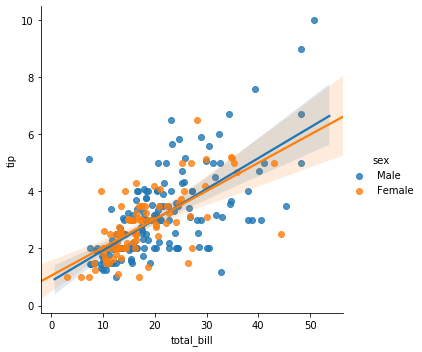

In [56]:
# scatter plot
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.show()

In [57]:
# use category type when working with enum data for performance
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


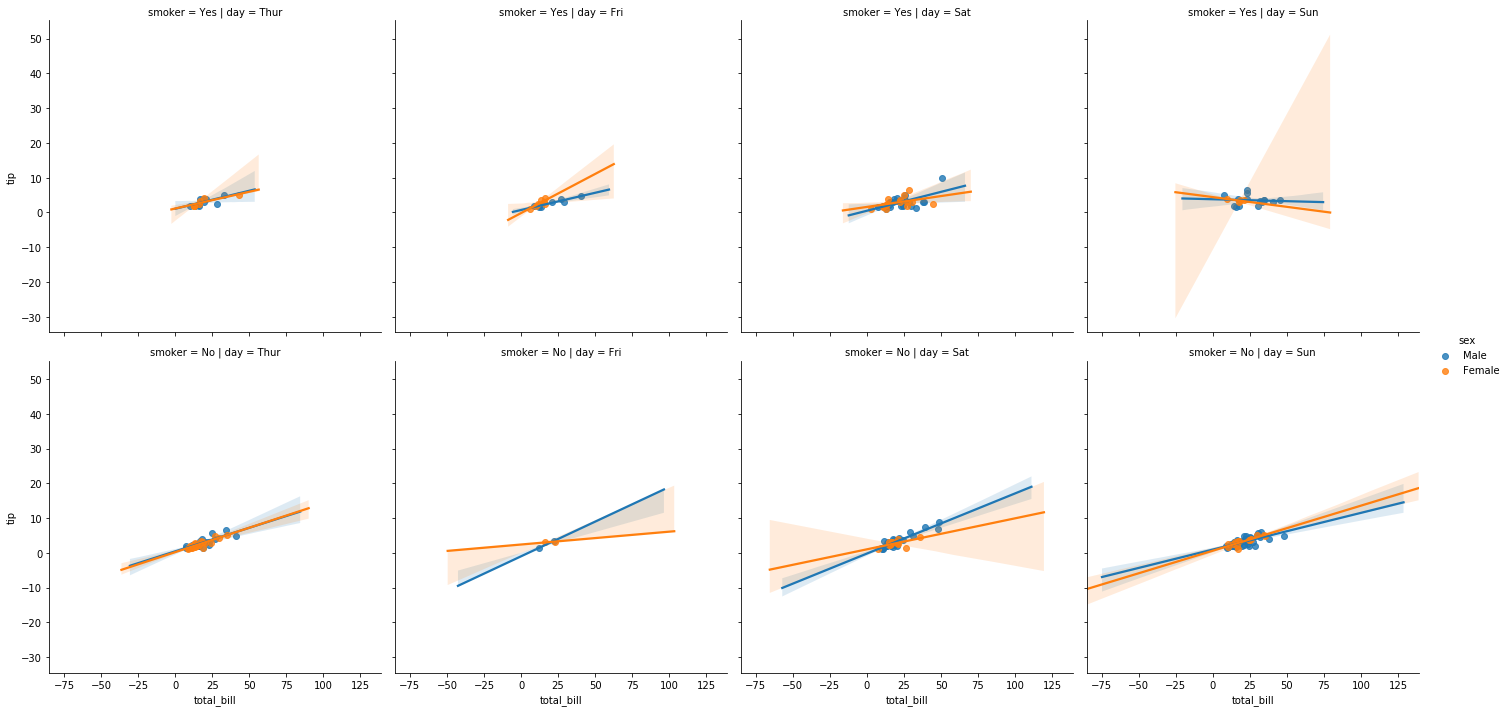

In [58]:
# scatter plot grouped by col and row
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips
          , col='day', row='smoker')
plt.show()